# Description

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

# Problem Statement / Business Objective

Reduce the time that cars spend on the test bench , resulting in lower carbon dioxide emissions without reducing Daimler’s standards.

# Machine Learning Problem

Our job is to predict how long a car on a production line will take to pass the testing phase. This is a classical regression problem.

# Performence Metric

* R2 (R square) metric

# Exploratory Data Analysis

Let's take a look at the data :

In [53]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [54]:
Benz_df = pd.read_csv('train.csv')
print("Data shape : ", Benz_df.shape)
print("Columns : ", Benz_df.columns)
Benz_df.head()

Data shape :  (4209, 378)
Columns :  Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


* 'y' is the time taken at Testing Phase in Seconds
* There are 376 Car features apart from the target variable 'y' and the 'ID' column
* The Car feature names are Anonymised.
* ID column is not equal to rows.

# Lets first look at our target varible 'y' ie time taken at Testing Phase (in seconds)

### Violin Plot of Target Variable 'y' ie time taken at Testing Phase (in seconds)

Text(0.5, 1.0, "Violin Plot of Target Variable 'y' ie time taken at Testing Phase (in seconds)")

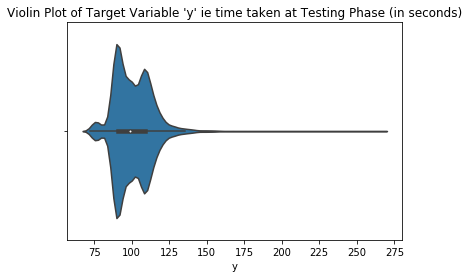

In [55]:
import seaborn as sns
sns.violinplot(x=Benz_df['y']).set_title("Violin Plot of Target Variable 'y' ie time taken at Testing Phase (in seconds)")

### Scatter Plot of Target Variable 'y' ie time taken at Testing Phase (in seconds)

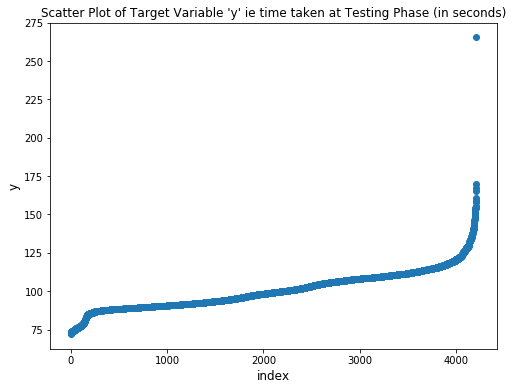

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64


In [56]:
plt.figure(figsize=(8,6))
plt.scatter(range(Benz_df.shape[0]), np.sort(Benz_df.y.values))
plt.title("Scatter Plot of Target Variable 'y' ie time taken at Testing Phase (in seconds)")
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

print(Benz_df['y'].describe())

* looking at the scatter plot it seems like a data point(at 265 seconds) is well above the rest.

###### Missing Values

In [5]:
Benz_df.isnull().any().any()

False

There are no Missing Values in the dataset

### Feature Analysis

In [6]:
# Seeing datatypes of all the columns Except ID and y Columns
cols = [c for c in Benz_df.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
Benz_df[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

So we have 376 integer columns and 8 categorical columns

#### Integer Features

###### Lets look at the cardinality of all columns

In [7]:
## Integer columns
unique_values_dict = {}
for col in Benz_df.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(Benz_df[col].unique()).tolist())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print("Number of Columns : ",len(columns))
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  [0, 1]
Number of Columns :  356
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142

Among the integer columns , 356 are binary feature containing 0 & 1 
And 12 feature are constant , containing only 0's
We can omit out features containg only one unique value

#### Lets find out the Difference in mean value of y , between the classes of binary features 

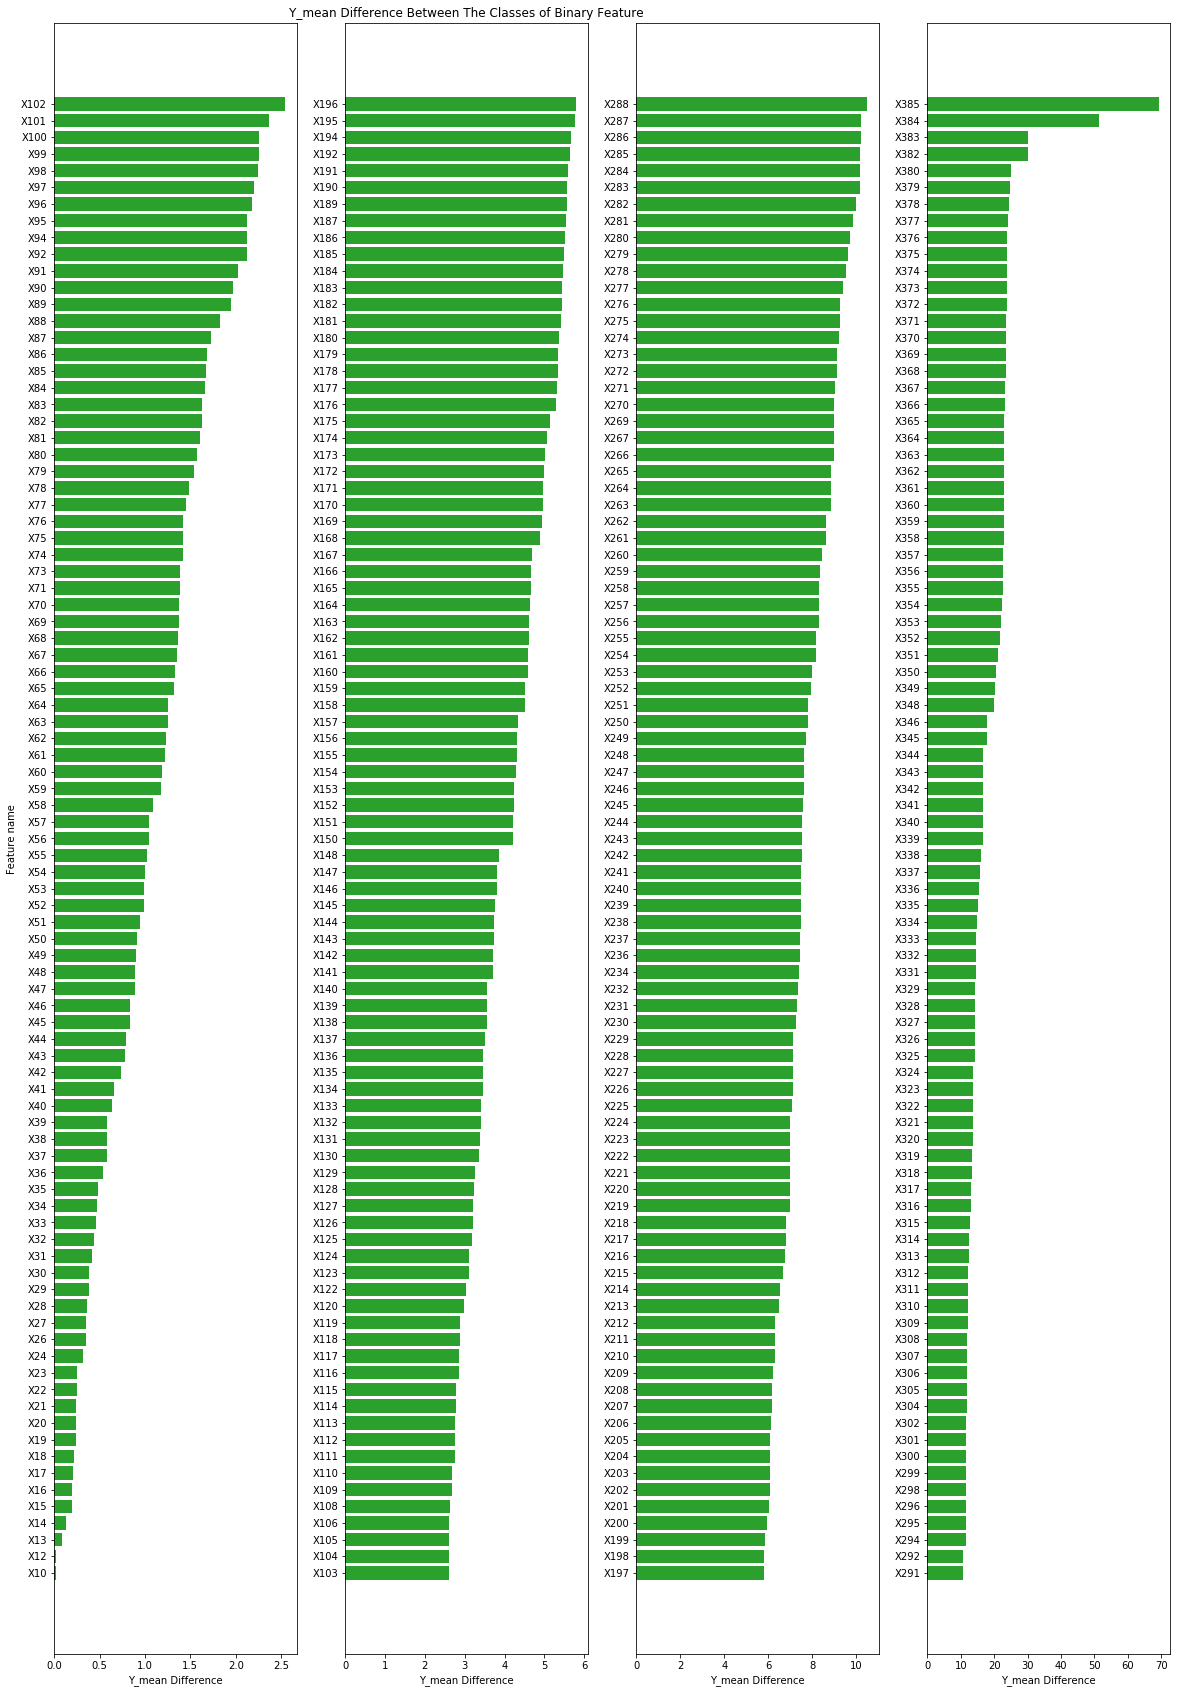

In [30]:
zero_mean_list = []
one_mean_list = []
cols_list = np.array(unique_values_dict['[0, 1]'])
for col in cols_list:
    zero_mean_list.append(Benz_df.loc[Benz_df[col]==0].y.mean())
    one_mean_list.append(Benz_df.loc[Benz_df[col]==1].y.mean())

y_mean_diffrence = np.absolute(np.array(zero_mean_list) - np.array(one_mean_list))
y_mean_diffrence = np.sort(y_mean_diffrence)

pal = sns.color_palette()
fig, ax = plt.subplots(1, 4, figsize=(20,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Y_mean Difference Between The Classes of Binary Feature')
for i in range(4):
    names, means = cols_list[i*89:(i+1)*89], y_mean_diffrence[i*89:(i+1)*89]
    ax[i].barh(range(len(means)), means, color=pal[2])
    ax[i].set_xlabel('Y_mean Difference')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

Features showing good mean difference like ( X102 , X196 , X136 , X288 , X385) 
implies that there is a good difference between the mean value of 'y' for each binary value,
Hence would be good for predicting our 'y' Variable

Where as There are Feature like (X10 , X12) , having negligible difference in y mean

###### Lets look at the count of 0's and 1's , for each binary feature

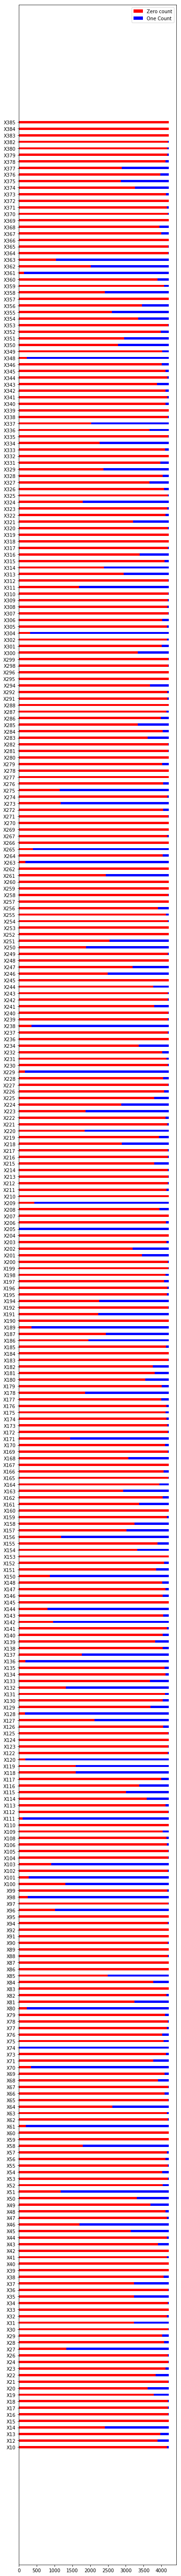

In [8]:
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((Benz_df[col]==0).sum())
    one_count_list.append((Benz_df[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35

plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

As we can see , there are some feature (like X10 , X18 , X61 , X74) where either of them dominates 

##### Categorical Features

###### Lets look at the cardinality and occurences of all categories in all columns 

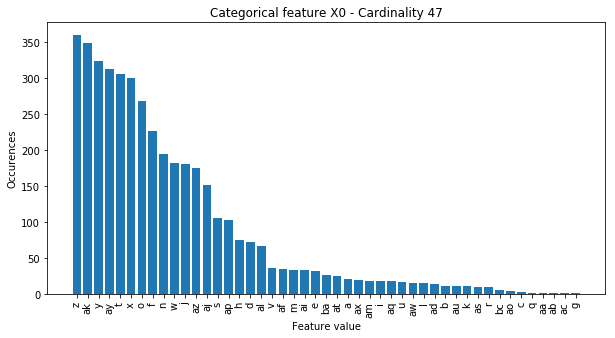

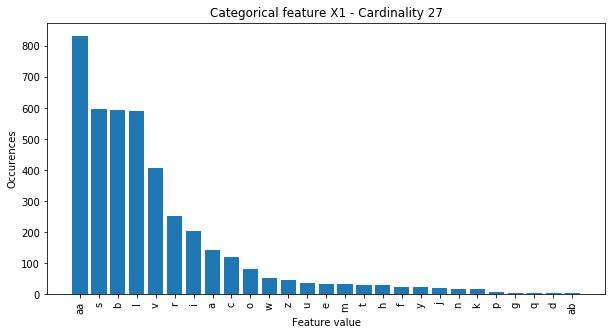

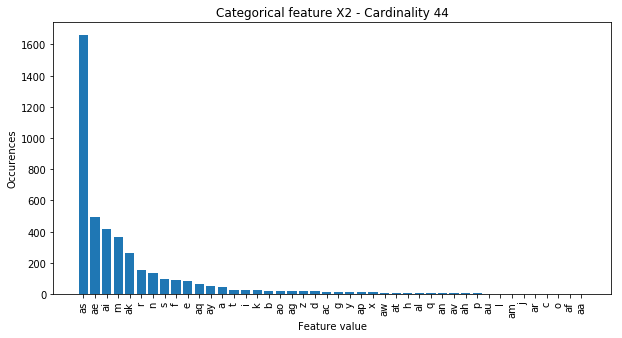

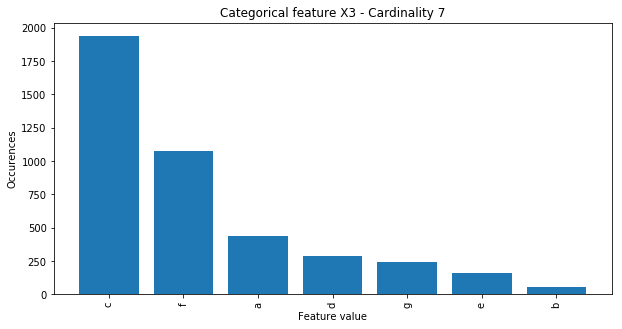

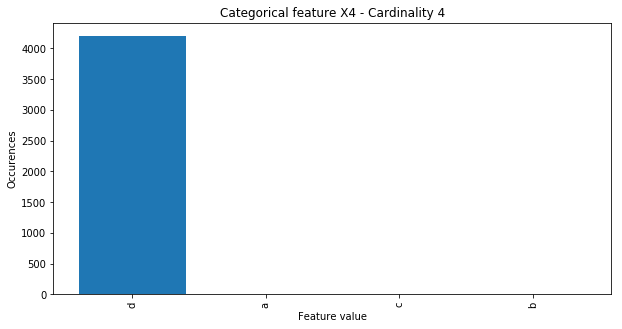

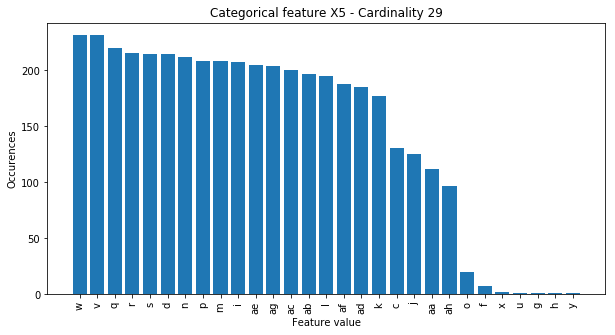

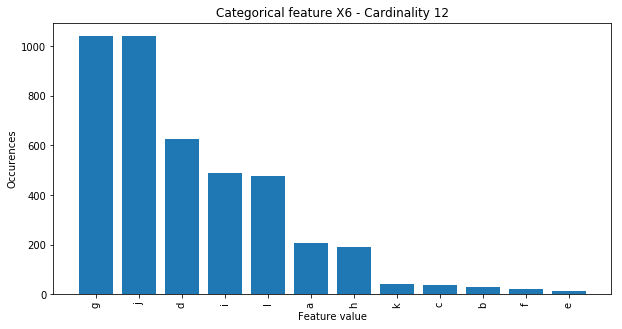

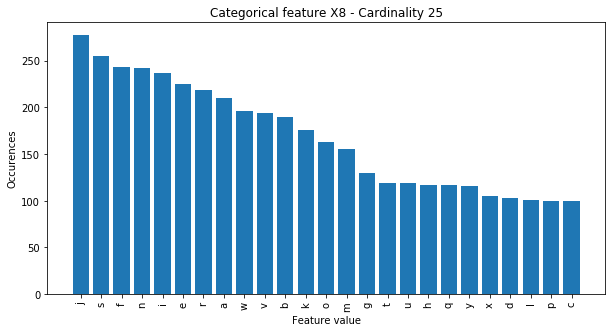

In [11]:
Categ_Features = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for c in Categ_Features:
    value_counts = Benz_df[c].value_counts()
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title('Categorical feature {} - Cardinality {}'.format(c, len(np.unique(Benz_df[c]))))
    plt.xlabel('Feature value')
    plt.ylabel('Occurences')
    plt.bar(range(len(value_counts)), value_counts.values)
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation='vertical')
    plt.show()

As we can see , there are some categories which dominates others in some columns.

## Modelling

In [40]:
Benz_df  = pd.read_csv('train.csv')
Benz_df.drop(Benz_df[Benz_df['y'] > 175].index, axis=0, inplace=True) ## Removing outlier

In [41]:
## Test train split
y = Benz_df['y']
X = Benz_df.drop(['ID','y'],axis=1)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# SET 1 , (PCA , ICA with Label Encoder)

# PCA

###### Source : Wikipedia
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

# ICA

###### Source : https://www.geeksforgeeks.org/ml-independent-component-analysis/
Independent Component Analysis (ICA) is a machine learning technique to separate independent sources from a mixed signal. Unlike principal component analysis which focuses on maximizing the variance of the data points, the independent component analysis focuses on independence, i.e. independent components.

##### Vectorizing categorical columns using Label Encoder

In [42]:
from sklearn.preprocessing import LabelEncoder
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(X_train[c].values) + list(X_test[c].values)) 
        X_train[c] = lbl.transform(list(X_train[c].values))
        X_test[c] = lbl.transform(list(X_test[c].values))

C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


#### Adding decomposed features : PCA And ICA features

In [43]:
from sklearn.decomposition import PCA, FastICA 
n_comp = 12

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(X_train)
pca2_results_test = pca.transform(X_test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(X_train)
ica2_results_test = ica.transform(X_test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    X_train['pca_' + str(i)] = pca2_results_train[:,i-1]
    X_test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    X_train['ica_' + str(i)] = ica2_results_train[:,i-1]
    X_test['ica_' + str(i)] = ica2_results_test[:, i-1]
    

y_mean = np.mean(y_train)

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: Se

In [44]:
print('Train Shape' ,X_train.shape)
print('Test Shape' ,X_test.shape)

Train Shape (2819, 400)
Test Shape (1389, 400)


# Important Features

#### Lets look at the importtant features and see whether the new features made really contribute to prdictions. 

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:51:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


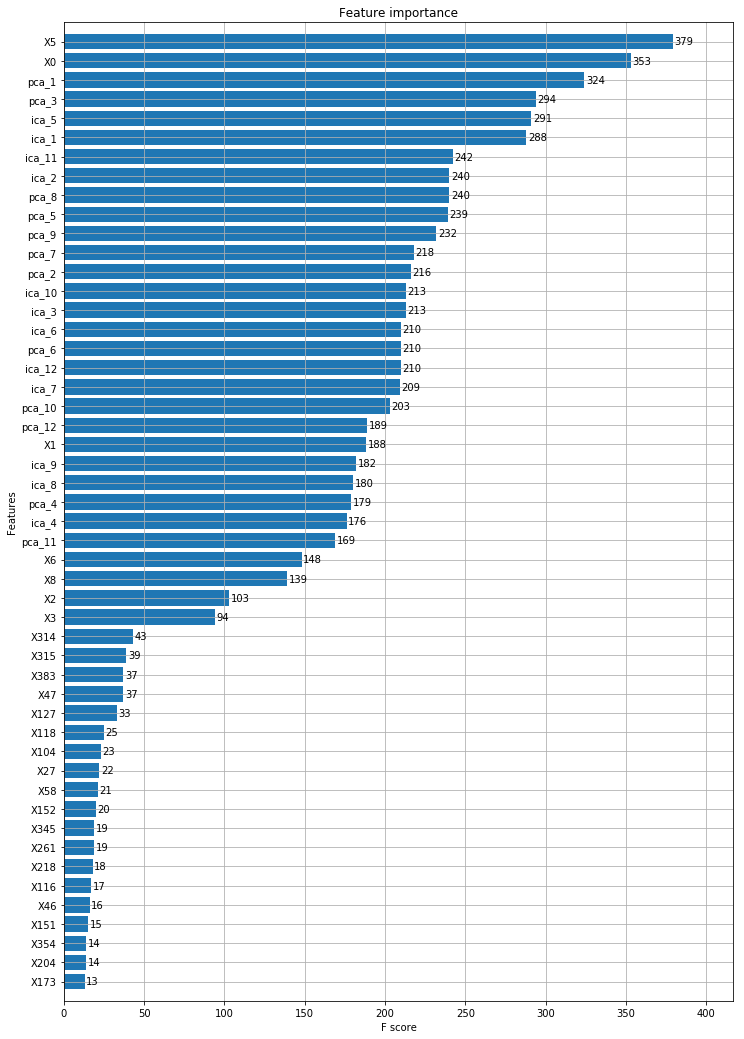

In [45]:
import xgboost as xgb
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=300, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

As we can see , the new features added contribute for better predictions

## Elastic Net Regression : Linear regression with combined L1 and L2 priors as regularizer.

In [86]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [87]:
cv_model.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
       n_alphas=100, n_jobs=-1, normalize=True, positive=False,
       precompute='auto', random_state=None, selection='cyclic',
       tol=0.0001, verbose=0)

In [88]:
print('Optimal alpha:' , cv_model.alpha_)
print('Optimal l1_ratio:' , cv_model.l1_ratio_)
print('Number of iterations' , cv_model.n_iter_)

Optimal alpha: 0.00508696975721008
Optimal l1_ratio: 1.0
Number of iterations 447


In [89]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

ElasticNet(alpha=0.00508696975721008, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=447, normalize=True, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [90]:
print('Train Score')
print(r2_score(y_train, model.predict(X_train)))
print('Test Score')
print(r2_score(y_test, model.predict(X_test)))

Train Score
0.6035282812775089
Test Score
0.5996612482684452


Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

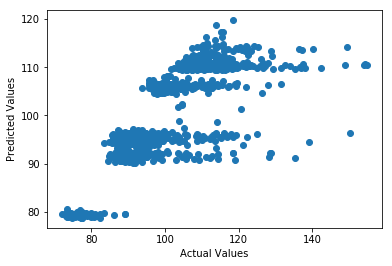

In [91]:
print('Actual Vs Predicted')
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## XGBOOST

In [31]:
## Cross validation
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

XGB = xgb.XGBRegressor(objective='reg:squarederror')
XGB_para = {'n_estimators':[100,300,500],'max_depth':[2, 3, 4] , 'learning_rate' : [0.001,0.01,0.1,0.2]}
clf = GridSearchCV(XGB, XGB_para, cv=3, scoring='r2')
clf.fit(X_train, y_train)

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 300, 500], 'max_depth': [2, 3, 4], 'learning_rate': [0.001, 0.01, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [32]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [33]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',learning_rate = 0.1,
                max_depth = 2, n_estimators = 100)
xg_reg.fit(X_train, y_train)

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:56:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [34]:
from sklearn.metrics import r2_score
preds = xg_reg.predict(X_test)


print('Train r2 :',r2_score(y_train, xg_reg.predict(X_train)))
print('Test r2 :', r2_score(y_test, preds)) 

Train r2 : 0.6478505129559475
Test r2 : 0.630212368976419


Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

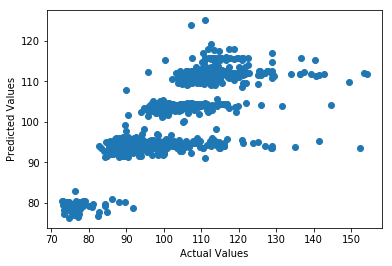

In [35]:
print('Actual Vs Predicted')
plt.scatter(y_test,preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Stacked  Model

In [40]:
## # Reference: https://github.com/nilaysen/Mercedes-Benz-Greener-Manufacturing-Kaggle/blob/master/merc.py
class StackingEstimator(BaseEstimator, TransformerMixin):
    
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y=None, **fit_params):
        self.estimator.fit(X, y, **fit_params)
        return self
    def transform(self, X):
        X = check_array(X)
        X_transformed = np.copy(X)
        # add class probabilities as a synthetic feature
        if issubclass(self.estimator.__class__, ClassifierMixin) and hasattr(self.estimator, 'predict_proba'):
            X_transformed = np.hstack((self.estimator.predict_proba(X), X))

        # add class prodiction as a synthetic feature
        X_transformed = np.hstack((np.reshape(self.estimator.predict(X), (-1, 1)), X_transformed))

        return X_transformed
    
stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=GradientBoostingRegressor(learning_rate=0.001, loss="huber", max_depth=3, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.7)),
    LassoLarsCV()

)


stacked_pipeline.fit(X_train, y_train)
results = stacked_pipeline.predict(X_test)

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.037e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 6.664e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.037e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  ConvergenceW

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=1.740e-02, with an active set of 16 regressors, and the smallest cholesky pivot element being 9.884e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 16 iterations, i.e. alpha=1.740e-02, with an active set of 16 regressors, and the smallest cholesky pivot element being 9.657e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 19 iterations, i.e. alpha=1.667e-02, with an active set of 19 regressors, and the smallest chole

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 42 iterations, i.e. alpha=4.479e-03, with an active set of 40 regressors, and the smallest cholesky pivot element being 2.581e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 66 iterations, i.e. alpha=3.013e-03, with an active set of 60 regressors, and the smallest cholesky pivot element being 1.490e-08. Reduce max_iter or increase eps parameters.
  Converge

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 20 iterations, i.e. alpha=7.303e-03, with an active set of 20 regressors, and the smallest cholesky pivot element being 5.268e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=7.301e-03, with an active set of 21 regressors, and the smallest cholesky pivot element being 5.268e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 21 iterations, i.e. alpha=7.301e-03, with an active set of 21 regressors, and the smallest chole

In [42]:
print('R2 score on train data:')
print(r2_score(y_train,stacked_pipeline.predict(X_train)))

print('R2 score on test data:')
print(r2_score(y_test,stacked_pipeline.predict(X_test)))

R2 score on train data:
0.6189375400738832
R2 score on test data:
0.6354401423931675


Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

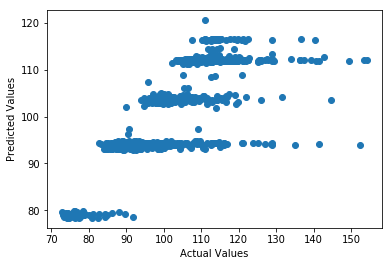

In [43]:
print('Actual Vs Predicted')
plt.scatter(y_test,stacked_pipeline.predict(X_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## Stacked And Averaged Model

In [44]:
print('R2 score on train data:') ## Averaged with the XGBoost Model
print(r2_score(y_train,stacked_pipeline.predict(X_train)*0.2855 + xg_reg.predict(X_train)*0.7145))

print('R2 score on test data:')
print(r2_score(y_test,stacked_pipeline.predict(X_test)*0.2855 + xg_reg.predict(X_test)*0.7145))

R2 score on train data:
0.6412852821531496
R2 score on test data:
0.6332870652752253


Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

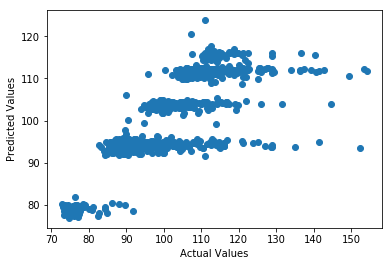

In [46]:
print('Actual Vs Predicted')
plt.scatter(y_test,stacked_pipeline.predict(X_test)*0.2855 + xg_reg.predict(X_test)*0.7145)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Set 2 : SET 1 , (PCA , ICA , TSVD , grp , srp with Label Encoder)

# Random Projection (Gaussian random projection (grp) & Sparse random projection (srp) )

In [ ]:
###### Source : https://machinelearningmedium.com/2017/07/28/random-projection-in-dimensionality-reduction/

Key Idea : If points in vector space are projected onto a randomly selected subspace of suitably high dimensions, then the distances between the points are approximately preserved.

In RP, a higher dimensional data is projected onto a lower-dimensional subspace using a random matrix whose columns have unit length.

Random Projections have emerged as a powerful method for dimensionality reduction. Theoretical results indicate that it preserves distances quite nicely but empirical results are sparse. It is often employed in dimensionality reduction in both noisy and noiseless data especially image and text data. Results of projecting on random lower-dimensional subspace yields results comparable to conventional methods like PCA etc but using it is computationally less expensive than the traditional alternatives.

###### Source : https://scikit-learn.org/stable/modules/random_projection.html
GRP : GaussianRandomProjection reduces the dimensionality by projecting the original input space on a randomly generated matrix where components are drawn from the following distribution N(0,1/n components)
 
SRP : Sparse random projection reduces the dimensionality by projecting the original input space using a sparse random matrix.

##### Feature Engineering

In [46]:
from sklearn.preprocessing import LabelEncoder
for c in X_train.columns:
    if X_train[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(X_train[c].values) + list(X_test[c].values)) 
        X_train[c] = lbl.transform(list(X_train[c].values))
        X_test[c] = lbl.transform(list(X_test[c].values))
        
from sklearn.decomposition import PCA, FastICA , TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
n_comp = 12

# PCA
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(X_train)
pca2_results_test = pca.transform(X_test)

# ICA
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(X_train)
ica2_results_test = ica.transform(X_test)

# TSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_train = tsvd.fit_transform(X_train)
tsvd_results_test = tsvd.transform(X_test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(X_train)
grp_results_test = grp.transform(X_test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(X_train)
srp_results_test = srp.transform(X_test)

# Append decomposition components to datasets
for i in range(1, n_comp+1):
    X_train['pca_' + str(i)] = pca2_results_train[:,i-1]
    X_test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    X_train['ica_' + str(i)] = ica2_results_train[:,i-1]
    X_test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
    X_train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
    X_test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

    X_train['grp_' + str(i)] = grp_results_train[:, i - 1]
    X_test['grp_' + str(i)] = grp_results_test[:, i - 1]

    X_train['srp_' + str(i)] = srp_results_train[:, i - 1]
    X_test['srp_' + str(i)] = srp_results_test[:, i - 1]
    

y_mean = np.mean(y_train)

C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [47]:
print('Train Shape' ,X_train.shape)
print('Test Shape' ,X_test.shape)

Train Shape (2819, 436)
Test Shape (1389, 436)


# Important Features

#### Lets look at the importtant features and see whether the new features made really contribute to prdictions. 

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:55:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


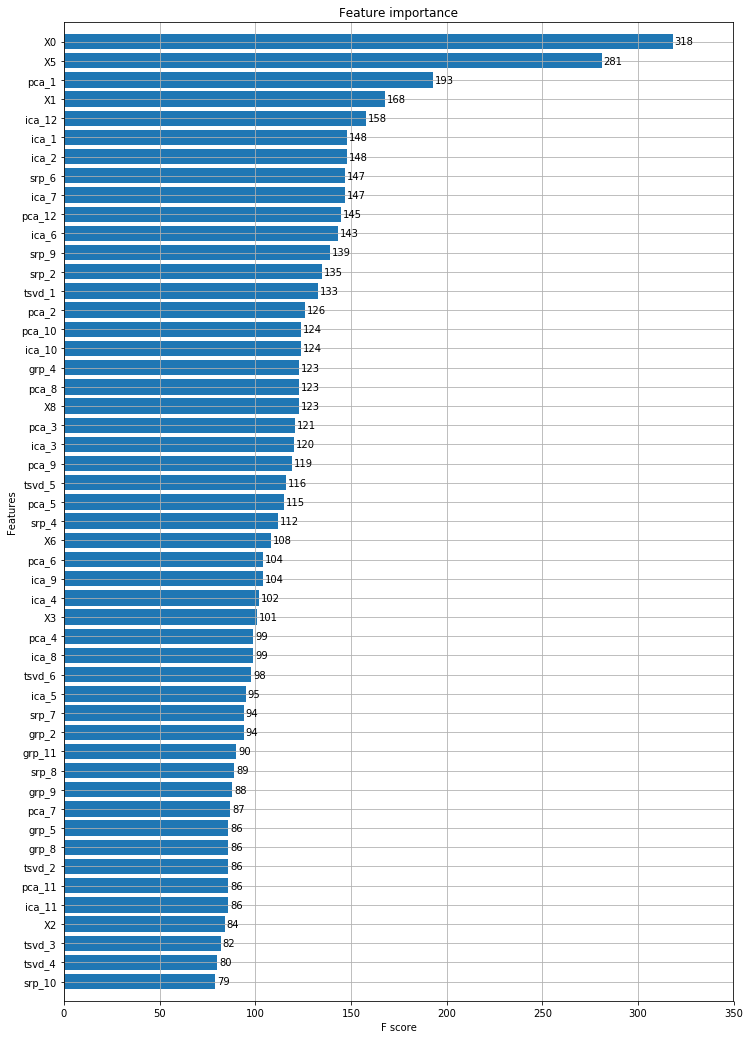

In [48]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(X_train, y_train, feature_names=X_train.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=300, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

## Elastic Net Regression

Optimal alpha: 0.003339585614035846
Optimal l1_ratio: 1.0
Number of iterations 391
Train Score
0.6085805059834002
Test Score
0.6195847628455537
Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

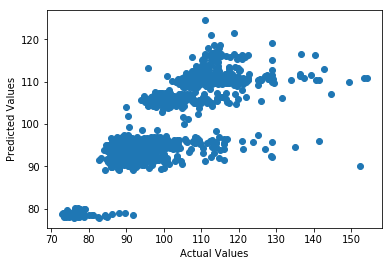

In [49]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

cv_model.fit(X_train, y_train)

print('Optimal alpha:' , cv_model.alpha_)
print('Optimal l1_ratio:' , cv_model.l1_ratio_)
print('Number of iterations' , cv_model.n_iter_)

from sklearn.linear_model import ElasticNetCV, ElasticNet

model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

print('Train Score')
print(r2_score(y_train, model.predict(X_train)))
print('Test Score')
print(r2_score(y_test, model.predict(X_test)))

print('Actual Vs Predicted')
plt.scatter(y_test, model.predict(X_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## XGBOOST

In [50]:
## Cross validation
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

XGB = xgb.XGBRegressor(objective='reg:squarederror')
XGB_para = {'n_estimators':[100,300,500],'max_depth':[2, 3, 4] , 'learning_rate' : [0.001,0.01,0.1,0.2]}
clf = GridSearchCV(XGB, XGB_para, cv=3, scoring='r2')
clf.fit(X_train, y_train)

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad

C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Sharad

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [100, 300, 500], 'max_depth': [2, 3, 4], 'learning_rate': [0.001, 0.01, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [51]:
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [52]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear',learning_rate = 0.1,
                max_depth = 2, n_estimators = 100)
xg_reg.fit(X_train, y_train)

[17:39:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

Train r2 : 0.6501487419979821
Test r2 : 0.6303809036930859
Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

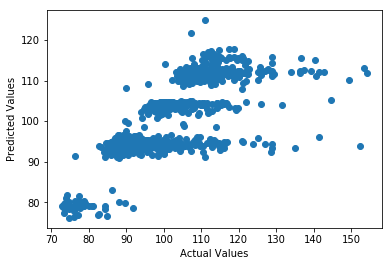

In [53]:
from sklearn.metrics import r2_score
preds = xg_reg.predict(X_test)


print('Train r2 :',r2_score(y_train, xg_reg.predict(X_train)))
print('Test r2 :', r2_score(y_test, preds)) 

print('Actual Vs Predicted')
plt.scatter(y_test,preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

## Stacked  Model

In [54]:
stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=GradientBoostingRegressor(learning_rate=0.001, loss="huber", max_depth=3, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.7)),
    LassoLarsCV()

)


stacked_pipeline.fit(X_train, y_train)
results = stacked_pipeline.predict(X_test)

print('R2 score on train data:')
print(r2_score(y_train,stacked_pipeline.predict(X_train)))

print('R2 score on test data:')
print(r2_score(y_test,stacked_pipeline.predict(X_test)))

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.037e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 6.664e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.037e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 6.495e-08. Reduce max_iter or increase eps parameters.
  ConvergenceW

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.455e-02, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.788e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=5.455e-02, with an active set of 3 regressors, and the smallest cholesky pi

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:337: ConvergenceWarning: Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 4 iterations, alpha=1.371e-02, previous alpha=1.370e-02, with an active set of 5 regressors.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 22 iterations, i.e. alpha=6.668e-03, with an active set of 22 regressors, and the smallest cholesky pivot element being 5.771e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=5.968e-03, with an active set of 29 regressors, and the smallest cholesky pivot element being 2.581e

R2 score on train data:
0.6181109646209477
R2 score on test data:
0.6352489629261115


In [55]:
print('R2 score on train data:')
print(r2_score(y_train,stacked_pipeline.predict(X_train)))

print('R2 score on test data:')
print(r2_score(y_test,stacked_pipeline.predict(X_test)))

R2 score on train data:
0.6181109646209477
R2 score on test data:
0.6352489629261115


Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

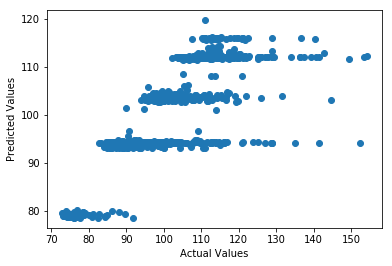

In [56]:
print('Actual Vs Predicted')
plt.scatter(y_test,stacked_pipeline.predict(X_test))
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Stacked And Averaged Model

In [57]:
print('R2 score on train data:') ## Averaged with the XGBoost Model
print(r2_score(y_train,stacked_pipeline.predict(X_train)*0.2855 + xg_reg.predict(X_train)*0.7145))

print('R2 score on test data:')
print(r2_score(y_test,stacked_pipeline.predict(X_test)*0.2855 + xg_reg.predict(X_test)*0.7145))

R2 score on train data:
0.6428699894431107
R2 score on test data:
0.6334817432380395


Actual Vs Predicted


Text(0, 0.5, 'Predicted Values')

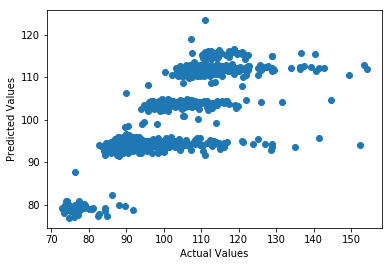

In [58]:
print('Actual Vs Predicted')
plt.scatter(y_test,stacked_pipeline.predict(X_test)*0.2855 + xg_reg.predict(X_test)*0.7145)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

### Procedure followed :

* Reading the Data
* Missing Values Check
* Dependent Varaible Analysis
* Feature's Analysis
* Feature Engineering
    * Removing Outliers
    * Vectorising Categorical Columns
    * Adding PCA And ICA Components
    * Adding TSVD , GRP and srp fetures
* Modelling

### Conclusion :

In [92]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SET","Algorithm" , 'R2 Score on Train Data' , 'R2 Score on Test Data']
x.add_row(["SET1(PCA,ICA with Label_Encoder)","Elastic Net Regression", 0.603 , 0.599])
x.add_row(["SET1(PCA,ICA with Label_Encoder)","XGBOOST Regression", 0.647 , 0.63])
x.add_row(["SET1(PCA,ICA with Label_Encoder)","Stacked Model", 0.618 , 0.635])
x.add_row(["SET1(PCA,ICA with Label_Encoder)","Stacked And Averaged Model", 0.641 , 0.633])
x.add_row(["SET2(PCA,ICA,TSVD,GRP,SRP with Label_Encoder)","Elastic Net Regression", 0.608 , 0.619])
x.add_row(["SET2(PCA,ICA,TSVD,GRP,SRP with Label_Encoder)","XGBOOST Regression", 0.650 , 0.63])
x.add_row(["SET2(PCA,ICA,TSVD,GRP,SRP with Label_Encoder)","Stacked Model", 0.618 , 0.635])
x.add_row(["SET2(PCA,ICA,TSVD,GRP,SRP with Label_Encoder)","Stacked And Averaged Model", 0.642 , 0.633])
print(x)

+-----------------------------------------------+----------------------------+------------------------+-----------------------+
|                      SET                      |         Algorithm          | R2 Score on Train Data | R2 Score on Test Data |
+-----------------------------------------------+----------------------------+------------------------+-----------------------+
|        SET1(PCA,ICA with Label_Encoder)       |   Elastic Net Regression   |         0.603          |         0.599         |
|        SET1(PCA,ICA with Label_Encoder)       |     XGBOOST Regression     |         0.647          |          0.63         |
|        SET1(PCA,ICA with Label_Encoder)       |       Stacked Model        |         0.618          |         0.635         |
|        SET1(PCA,ICA with Label_Encoder)       | Stacked And Averaged Model |         0.641          |         0.633         |
| SET2(PCA,ICA,TSVD,GRP,SRP with Label_Encoder) |   Elastic Net Regression   |         0.608          | 

* There is not much difference between scores of set 1 and set 2

In [ ]:
* Stacked Model Has given better result.
* Making final Model with Stacked Model.

## Final Model : Modularising Code

In [93]:

def final_Model(df) :
    
    df.drop(df[df['y'] > 175].index, axis=0, inplace=True) ## Removing outlier
    ## Test train split
    y = df['y']
    X = df.drop(['ID','y'],axis=1)

    # train test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    from sklearn.preprocessing import LabelEncoder
    for c in X_train.columns:
        if X_train[c].dtype == 'object':
            lbl = LabelEncoder() 
            lbl.fit(list(X_train[c].values) + list(X_test[c].values)) 
            X_train[c] = lbl.transform(list(X_train[c].values))
            X_test[c] = lbl.transform(list(X_test[c].values))
        
    from sklearn.decomposition import PCA, FastICA , TruncatedSVD
    from sklearn.random_projection import GaussianRandomProjection
    from sklearn.random_projection import SparseRandomProjection
    n_comp = 12

    # PCA
    pca = PCA(n_components=n_comp, random_state=42)
    pca2_results_train = pca.fit_transform(X_train)
    pca2_results_test = pca.transform(X_test)

    # ICA
    ica = FastICA(n_components=n_comp, random_state=42)
    ica2_results_train = ica.fit_transform(X_train)
    ica2_results_test = ica.transform(X_test)

    # TSVD
    tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
    tsvd_results_train = tsvd.fit_transform(X_train)
    tsvd_results_test = tsvd.transform(X_test)

    # GRP
    grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
    grp_results_train = grp.fit_transform(X_train)
    grp_results_test = grp.transform(X_test)

    # SRP
    srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
    srp_results_train = srp.fit_transform(X_train)
    srp_results_test = srp.transform(X_test)

    # Append decomposition components to datasets
    for i in range(1, n_comp+1):
        X_train['pca_' + str(i)] = pca2_results_train[:,i-1]
        X_test['pca_' + str(i)] = pca2_results_test[:, i-1]
    
        X_train['ica_' + str(i)] = ica2_results_train[:,i-1]
        X_test['ica_' + str(i)] = ica2_results_test[:, i-1]
    
        X_train['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
        X_test['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

        X_train['grp_' + str(i)] = grp_results_train[:, i - 1]
        X_test['grp_' + str(i)] = grp_results_test[:, i - 1]

        X_train['srp_' + str(i)] = srp_results_train[:, i - 1]
        X_test['srp_' + str(i)] = srp_results_test[:, i - 1]
    


    stacked_pipeline = make_pipeline(
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    StackingEstimator(estimator=GradientBoostingRegressor(learning_rate=0.001, loss="huber", max_depth=3, max_features=0.55, min_samples_leaf=18, min_samples_split=14, subsample=0.7)),
    LassoLarsCV())


    stacked_pipeline.fit(X_train, y_train)
    results = stacked_pipeline.predict(X_test)

    print('R2 score on train data:')
    print(r2_score(y_train,stacked_pipeline.predict(X_train)))

    print('R2 score on test data:')
    print(r2_score(y_test,stacked_pipeline.predict(X_test)))
    
    print('Actual Vs Predicted')
    plt.scatter(y_test,stacked_pipeline.predict(X_test))
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')

C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: SettingWithCopyWarning: 
A val

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.303e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.885e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=9.303e-02, with an active set of 2 regressors, and the smallest cholesky pivot element being 7.814e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=6.207e-02, with an active set of 7 regressors, and the smallest cholesky pi

C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 205 iterations, i.e. alpha=7.916e-04, with an active set of 159 regressors, and the smallest cholesky pivot element being 9.186e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 205 iterations, i.e. alpha=7.916e-04, with an active set of 159 regressors, and the smallest cholesky pivot element being 9.771e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\Sharad\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 205 iterations, i.e. alpha=7.916e-04, with an active set of 159 regressors, and the smallest

R2 score on train data:
0.6094053167449338
R2 score on test data:
0.579671465810382
Actual Vs Predicted


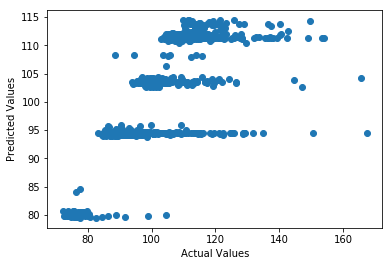

In [94]:
Benz_df = pd.read_csv('train.csv')
final_Model(Benz_df)

# Kaggle Score

Public Leader Board


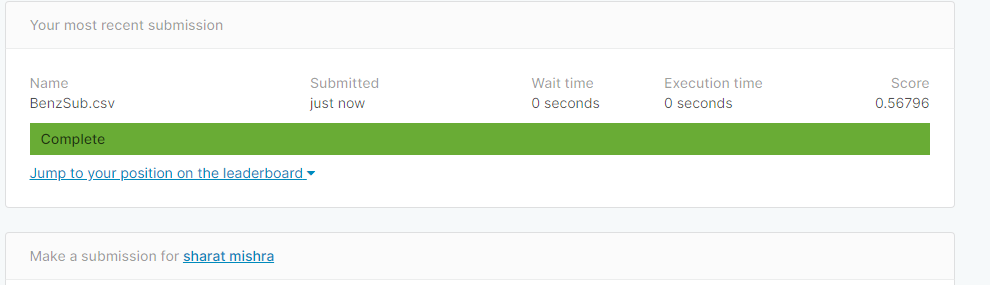

In [98]:
print('Public Leader Board')
from IPython.display import Image
Image(filename='Benz_KScore.png')

In [ ]:
# I Reffered different kernels and discussion for the Competition  and tried incorporating 
# Different Feature Engineering Techniques  (1st place solution : Public LB, 0.55799, Private LB: 0.55421)
# My Score is in Top 10% for Private Leader Board
# The score to get into top 10% of Public Leader Board is 0.57736

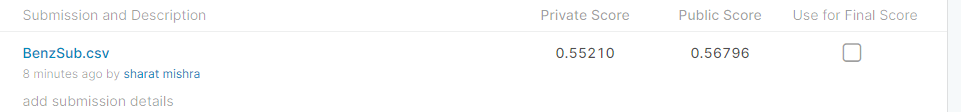

In [99]:
from IPython.display import Image
Image(filename='KScore.png')

#### Please Accept

# References

* Kaggle Discussions and Kernels 
* https://www.kaggle.com/hakeem/stacked-then-averaged-models-0-5697?scriptVersionId=1236940
* https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/36126